<a href="https://colab.research.google.com/github/vsoos/CloudComputing/blob/main/ex1/advanced_ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced extra task 2 - Spam filter 98% Accuracy

In [ ]:
!pip install joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import joblib
import os
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_path = '/content/drive/MyDrive/cloudcomputing2023_VincenzinaSoos/ex1'
os.chdir(folder_path)

In [ ]:
df = pd.read_csv('data/emails.csv')

In [ ]:
df.head()

,Text,Spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
df.isna().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()
df= df[df['Spam'].isin([0, 1])]

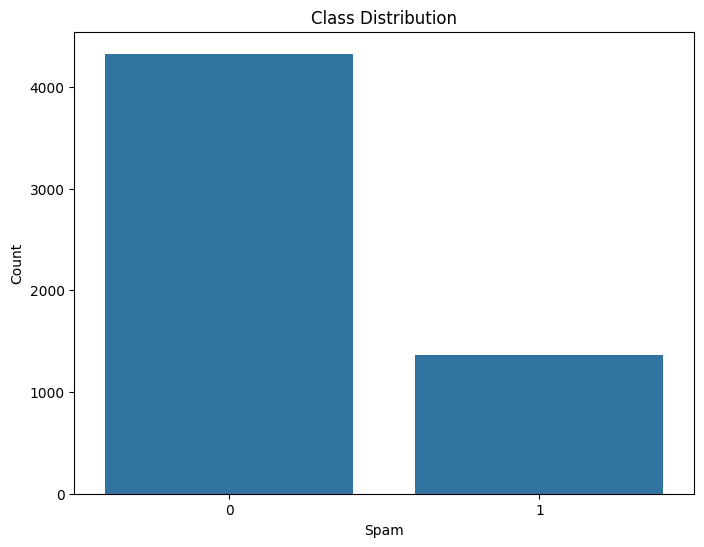

In [ ]:
# Plotting class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Spam', data=df)
plt.title('Class Distribution')
plt.xlabel('Spam')
plt.ylabel('Count')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


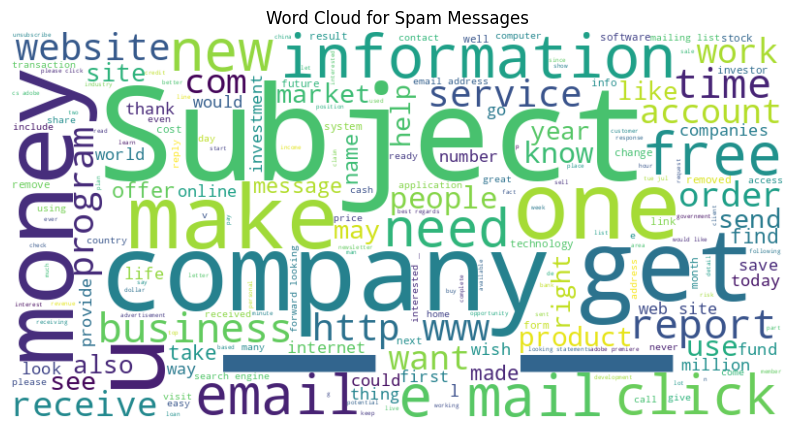

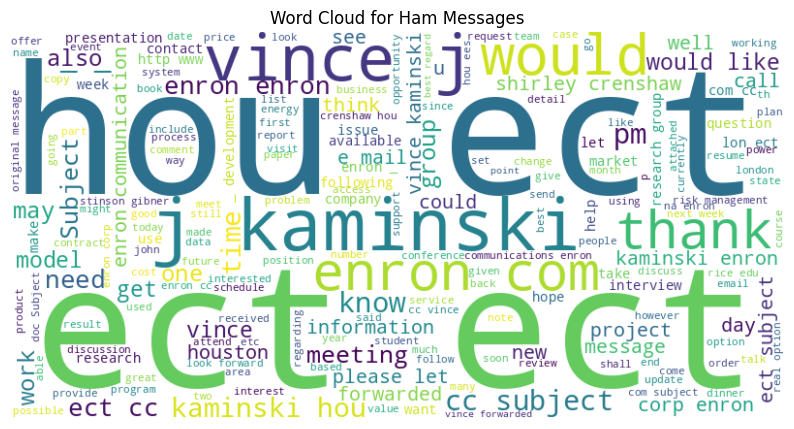

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

# combine all messages
spam_messages = ' '.join(df[df['Spam'] == 1]['Text'])
ham_messages = ' '.join(df[df['Spam'] == 0]['Text'])

# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(stopwords.words('english'))).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generating word cloud for 'spam' messages
generate_wordcloud(spam_messages, 'Word Cloud for Spam Messages')

# Generating word cloud for 'ham' messages
generate_wordcloud(ham_messages, 'Word Cloud for Ham Messages')

In [ ]:
# Vectorization
cv = CountVectorizer()
x = df['Text']
y = df['Spam']
x_vectorized = cv.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_vectorized, y, test_size=0.2, random_state=42)
x_train = x_train.toarray()
x_test = x_test.toarray()

In [ ]:
# Deep Learning Model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))
model.add(Dropout(0.7))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                2387456   
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2389569 (9.12 MB)
Trainable params: 2389569 (9.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=6, batch_size=32, validation_data=(x_test, y_test), verbose=1)

Epoch 1/6
143/143 [==============================] - 15s 94ms/step - loss: 0.2710 - accuracy: 0.9004 - val_loss: 0.0745 - val_accuracy: 0.9851
Epoch 2/6
143/143 [==============================] - 9s 66ms/step - loss: 0.0568 - accuracy: 0.9899 - val_loss: 0.0404 - val_accuracy: 0.9895
Epoch 3/6
143/143 [==============================] - 10s 68ms/step - loss: 0.0240 - accuracy: 0.9974 - val_loss: 0.0338 - val_accuracy: 0.9930
Epoch 4/6
143/143 [==============================] - 11s 77ms/step - loss: 0.0133 - accuracy: 0.9985 - val_loss: 0.0342 - val_accuracy: 0.9930
Epoch 5/6
143/143 [==============================] - 9s 61ms/step - loss: 0.0134 - accuracy: 0.9978 - val_loss: 0.0399 - val_accuracy: 0.9895
Epoch 6/6
143/143 [==============================] - 11s 74ms/step - loss: 0.0258 - accuracy: 0.9974 - val_loss: 0.0359 - val_accuracy: 0.9939


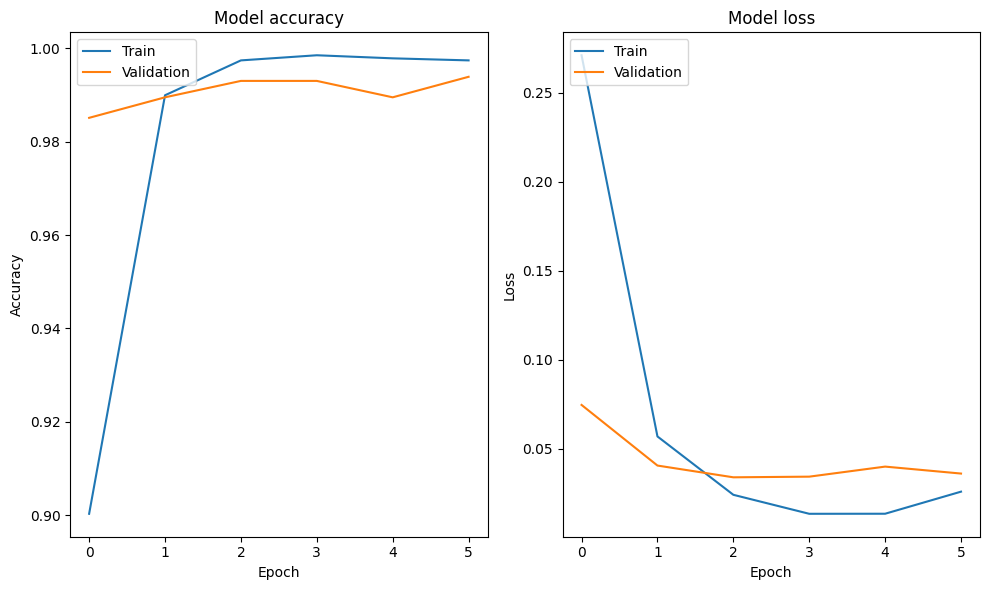

In [ ]:
plt.figure(figsize=(10, 6))

# training and validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 score: {f1:.4f}')

36/36 [==============================] - 2s 37ms/step
Accuracy: 0.9939
Precision: 0.9966
Recall: 0.9797
F1 score: 0.9881


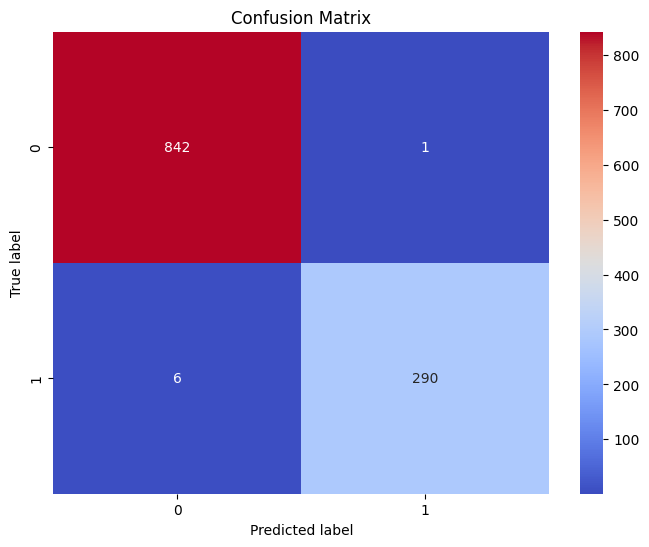

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="coolwarm", fmt="d")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()